# Importing all Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('1_housing.csv')

In [4]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
583,-122.08,37.72,32.0,2476.0,368.0,1048.0,367.0,5.6194,274700.0,NEAR BAY
10840,-117.93,33.65,26.0,5831.0,1546.0,4738.0,1477.0,3.1483,213000.0,<1H OCEAN
15803,-122.44,37.76,35.0,1581.0,422.0,580.0,388.0,4.0500,423100.0,NEAR BAY
5235,-118.23,33.94,35.0,1090.0,267.0,1339.0,263.0,2.1607,97600.0,<1H OCEAN
19908,-119.26,36.30,18.0,3578.0,720.0,1540.0,640.0,2.4250,84600.0,INLAND


In [5]:
df.shape

(20640, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
df_numerical = df.drop('ocean_proximity', axis=1)

In [11]:
df_numerical.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


1. It can be observed that median income shows the highest correlation with the target column.
2. Columns longitude, latitude and population are least correlated with the target column, therefore, we can remove these columns.

In [12]:
df.drop(['longitude','latitude','population'], axis=1, inplace=True)

In [13]:
df.head()

,housing_median_age,total_rooms,total_bedrooms,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,259.0,3.8462,342200.0,NEAR BAY


### Conversion of Categorical Column into Numerical

In [14]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [15]:
df['ocean_proximity'].nunique()

5

In [16]:
df['ocean_proximity'].value_counts().reset_index()

,ocean_proximity,count
0,<1H OCEAN,9136
1,INLAND,6551
2,NEAR OCEAN,2658
3,NEAR BAY,2290
4,ISLAND,5


#### Since OneHotEncodin need a 2D array therefore, we will convert the pandas series into a 2D array

In [17]:
categorical_col = df['ocean_proximity'].values
categorical_col

array(['NEAR BAY', 'NEAR BAY', 'NEAR BAY', ..., 'INLAND', 'INLAND',
       'INLAND'], dtype=object)

In [18]:
array_2d = categorical_col.reshape(-1,1)
array_2d

array([['NEAR BAY'],
       ['NEAR BAY'],
       ['NEAR BAY'],
       ...,
       ['INLAND'],
       ['INLAND'],
       ['INLAND']], dtype=object)

#### Use of one hot encoder
- one hot encoding - It transforms each unique category of a column into a new binary column (0 or 1).


In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(array_2d)

This returns a sparse matrix where majority of the values are zeros

In [21]:
encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20640 stored elements and shape (20640, 5)>

To visualize the data, we convert it into an array

In [22]:
encoded.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [23]:
# This method is used to return the order of unique categories (in which the matrix is created)
encoder.categories_[0]

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

#### creating a new dataframe of binary columns and merging it with the original dataset

In [24]:
df[encoder.categories_[0]] = encoded.toarray()

In [25]:
df.drop('ocean_proximity', axis=1, inplace=True)

In [26]:
df.head()

,housing_median_age,total_rooms,total_bedrooms,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,880.0,129.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,21.0,7099.0,1106.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,52.0,1467.0,190.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,52.0,1274.0,235.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,52.0,1627.0,280.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


In [27]:
df.shape

(20640, 11)

### Dividing the Dataset into input and ouput (features and target)

In [28]:
x = df.drop('median_house_value', axis=1)
y = df['median_house_value']

### Splitting the Data into Train and Test¶
- Dataset can be splitted using slicing and indexing
- For splitting we can use .loc and iloc methods.
- This way splits the data in a sequence or order.
- Hence, we use train_test_split method of sklearn for random shuffled splitting.

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [31]:
x_train.shape, y_train.shape

((16512, 10), (16512,))

In [32]:
x_test.shape, y_test.shape

((4128, 10), (4128,))

### Checking the Missing Values

In [33]:
x_train.isnull().sum()

housing_median_age      0
total_rooms             0
total_bedrooms        158
households              0
median_income           0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [34]:
med = x_train['total_bedrooms'].median()
med

np.float64(434.0)

### filling the missing values

In [35]:
x_train['total_bedrooms'].fillna(med, inplace=True)
x_train.isna().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
households            0
median_income         0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

As we can see there are no null cells left in the training data,
hence, we will do scaling

### Visualizing the dataset using matplotlib

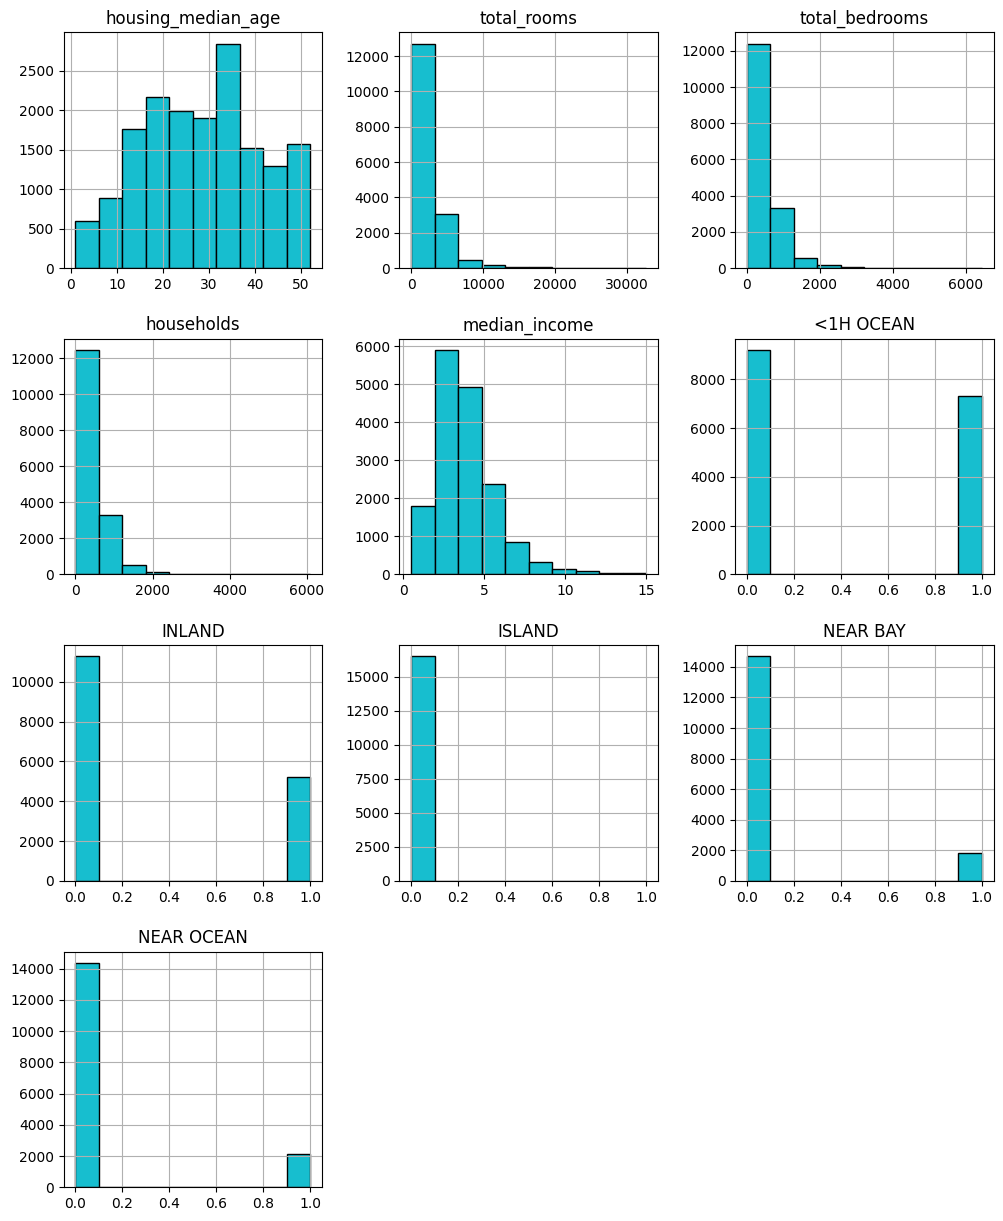

In [36]:
x_train.hist(bins=10, figsize=(12,15), color='C9', edgecolor='black')
plt.show()

The observation rise a conclusion that there is a possibility of outliers in some of the columns.

### Types of Scaling -
- Min-Max Scaling - Highly impacted by outliers
- Standard Scaling - Outlier prone<br>
Here, we will use Standard Scaling

In [37]:
data = x_train.iloc[:,:5]
data.head()

,housing_median_age,total_rooms,total_bedrooms,households,median_income
12069,6.0,502.0,76.0,65.0,4.2386
15925,52.0,2381.0,492.0,447.0,4.3898
11162,26.0,1718.0,385.0,368.0,3.9333
4904,38.0,697.0,208.0,206.0,1.4653
4683,52.0,2373.0,601.0,576.0,3.1765


In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(data)
x_train_scaled

array([[-1.79507596, -0.97773624, -1.09568908, -1.1356496 ,  0.19001247],
       [ 1.85553889, -0.11850059, -0.10619766, -0.13688171,  0.26931072],
       [-0.20785212, -0.42167953, -0.36070627, -0.34343319,  0.02989505],
       ...,
       [ 0.18895385, -0.55291989, -0.2441556 , -0.27806879, -0.35589721],
       [ 0.42703742, -0.23556516, -0.09192615, -0.08197562,  0.92053182],
       [-1.08082523, -0.67181359, -0.49628562, -0.52645348, -1.30490629]])

In [40]:
x_train[data.columns] = x_train_scaled
x_train.head()

,housing_median_age,total_rooms,total_bedrooms,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12069,-1.795076,-0.977736,-1.095689,-1.135650,0.190012,0.0,1.0,0.0,0.0,0.0
15925,1.855539,-0.118501,-0.106198,-0.136882,0.269311,0.0,0.0,0.0,1.0,0.0
11162,-0.207852,-0.421680,-0.360706,-0.343433,0.029895,1.0,0.0,0.0,0.0,0.0
4904,0.744482,-0.888566,-0.781716,-0.766994,-1.264470,1.0,0.0,0.0,0.0,0.0
4683,1.855539,-0.122159,0.153068,0.200399,-0.367016,1.0,0.0,0.0,0.0,0.0


## **MODELLING**

### 1. Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [43]:
y_pred_1 = lin_reg.predict(x_train)

### Visualizing the prices¶

#### Line plot

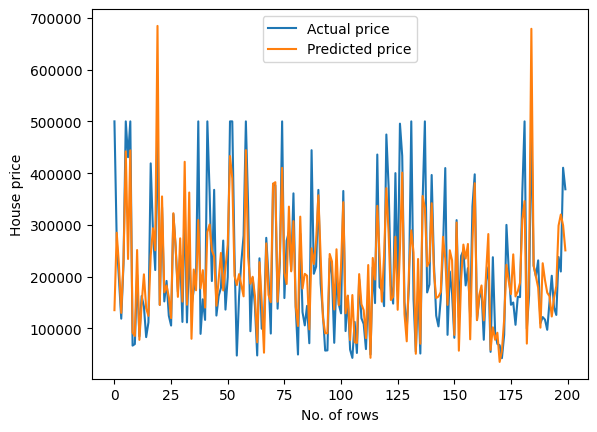

In [44]:
plt.plot(np.array(y_train)[:200], label='Actual price')
plt.plot(y_pred_1[:200], label='Predicted price')
plt.xlabel('No. of rows')
plt.ylabel('House price')
plt.legend()
plt.show()

#### Density plot

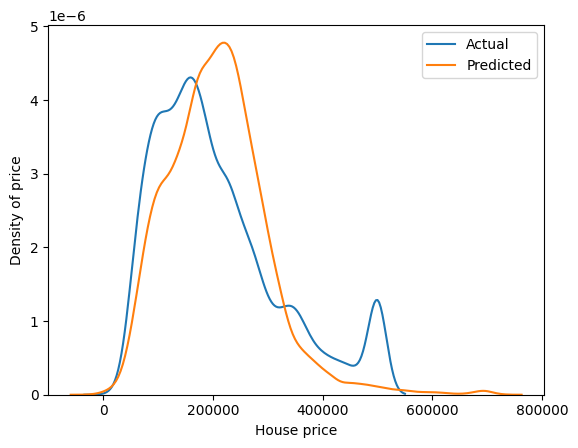

In [45]:
sns.kdeplot(y_train, label='Actual')
sns.kdeplot(y_pred_1, label='Predicted')
plt.xlabel('House price')
plt.ylabel('Density of price')
plt.legend()
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error

In [48]:
mse = mean_squared_error(y_train, y_pred_1, squared=False)
mse

np.float64(71969.0811141431)

### 2. Decision Tree

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [51]:
y_pred_2 = tree_reg.predict(x_train)

#### Line plot

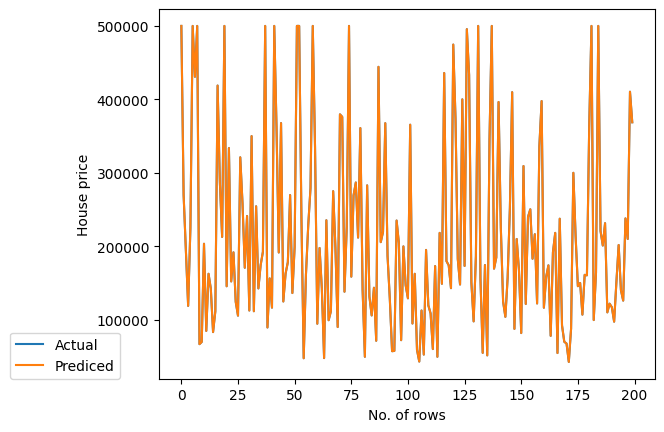

In [52]:
plt.plot(np.array(y_train)[:200], label='Actual')
plt.plot(y_pred_2[:200], label='Prediced')
plt.xlabel('No. of rows')
plt.ylabel('House price')
plt.legend(loc=(-0.3,0))
plt.show()

#### 2. Density plot

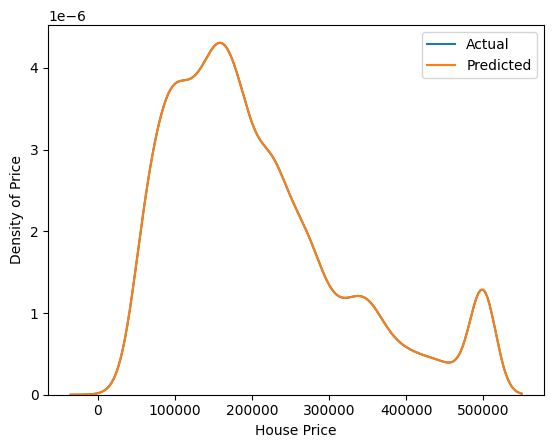

In [53]:
sns.kdeplot(y_train, label='Actual')
sns.kdeplot(y_pred_2, label='Predicted')
plt.xlabel('House Price')
plt.ylabel('Density of Price')
plt.legend()
plt.show()

In [54]:
tree_rmse = mean_squared_error(y_train, y_pred_2, squared=False)
tree_rmse

np.float64(0.0)

### 3. Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
forest_reg = RandomForestRegressor(n_estimators=100, max_features=10, random_state=42)
forest_reg.fit(x_train,y_train)

RandomForestRegressor(max_features=10, random_state=42)

In [57]:
y_pred_3 = forest_reg.predict(x_train)

#### Line plot

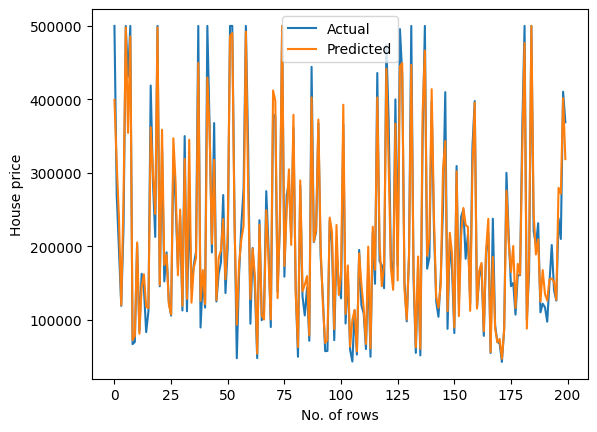

In [58]:
plt.plot(np.array(y_train)[:200], label='Actual')
plt.plot(y_pred_3[:200], label='Predicted')
plt.xlabel('No. of rows')
plt.ylabel('House price')
plt.legend()
plt.show()

#### Density plot

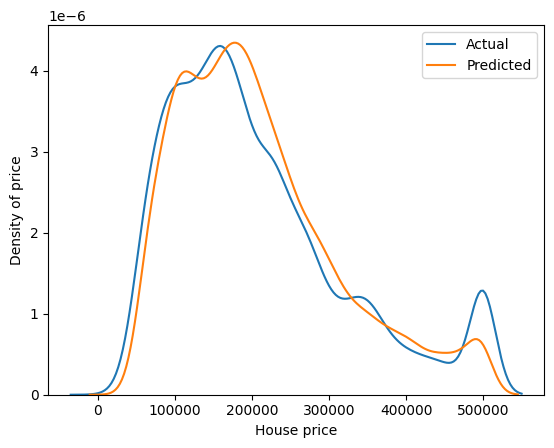

In [59]:
sns.kdeplot(y_train, label='Actual')
sns.kdeplot(y_pred_3, label='Predicted')
plt.xlabel('House price')
plt.ylabel('Density of price')
plt.legend()
plt.show()

In [60]:
forest_rmse = mean_squared_error(y_train, y_pred_3, squared=False)
forest_rmse

np.float64(25152.605580019703)

##### Applying cross validation to all the three models

In [61]:
from sklearn.model_selection import cross_val_score

Linear regression

In [63]:
lin_reg_score = cross_val_score(lin_reg, x_train, y_train, 
                scoring='neg_mean_squared_error', cv=10)
lin_reg_score

array([-5.66644315e+09, -4.83734357e+09, -5.31588201e+09, -5.04566764e+09,
       -5.91604940e+09, -5.06475725e+09, -5.09682592e+09, -4.97041800e+09,
       -5.18385080e+09, -4.79989041e+09])

In [64]:
lin_reg_rmse_score = np.sqrt(-lin_reg_score)
lin_reg_rmse_score

array([75275.78062855, 69551.01414766, 72910.09537563, 71032.86311229,
       76915.85925314, 71167.10789927, 71392.05779346, 70501.19147445,
       71998.96390185, 69281.24136793])

Decision Tree

In [65]:
tree_reg_score = cross_val_score(tree_reg, x_train, y_train,
                scoring="neg_mean_squared_error", cv=10)
tree_reg_score

array([-8.76641788e+09, -8.23186540e+09, -8.04002401e+09, -8.40306131e+09,
       -9.08976096e+09, -8.68700525e+09, -7.86110951e+09, -8.01818298e+09,
       -9.16645668e+09, -7.49953605e+09])

In [66]:
tree_reg_rmse_scores = np.sqrt(-tree_reg_score)
tree_reg_rmse_scores

array([93629.1508068 , 90729.62803873, 89666.18096187, 91668.21317341,
       95340.23787923, 93204.10531942, 88662.89818133, 89544.30736319,
       95741.61415672, 86599.86173483])

Random Forest

In [67]:
forest_reg_score = cross_val_score(forest_reg, x_train, y_train,
                    scoring='neg_mean_squared_error', cv=10)
forest_reg_score

array([-4.74946392e+09, -4.42217479e+09, -4.64135274e+09, -4.43654547e+09,
       -5.06350404e+09, -4.33019941e+09, -4.49864435e+09, -4.54854317e+09,
       -4.57066954e+09, -3.92599617e+09])

In [68]:
forest_reg_rmse_score = np.sqrt(-forest_reg_score)
forest_reg_rmse_score

array([68916.35454616, 66499.43453989, 68127.47422326, 66607.39803738,
       71158.30266217, 65804.25069996, 67071.9341653 , 67442.88824432,
       67606.72702359, 62657.7702245 ])

After evaluation we came to a conclusion that random forest is performing better on the train data as compared to linear regression and decision tree<br>
So, we can select random forest as the final model

<b>Joblib Library</b> - Used to serialize (save) a trained machine learning model to a file and later deserialize (load) it back into memory

In [69]:
import joblib
joblib.dump(forest_reg, 'final_model.pkl')

['final_model.pkl']

### **Note**:
### This is the final model. Save it and use it for predictions.
#### Do not train any other model again using test data.
## Test Data PreProcessing
1. Fill the missing values of test data using the median of training data.
2. Perform scaling by applying the transform method using the previous object only. Do not create a new object.
3. Do not train any model again. Do not apply cross validation or any other steps. Only the final model we have prepared will be used with test data.
4. Use X_test inside final_model.predict() method for making prdictions.
5. Calculate RMSE

## **Preparing Test Data**

In [70]:
x_test.head()

,housing_median_age,total_rooms,total_bedrooms,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14740,22.0,2101.0,399.0,371.0,4.1518,0.0,0.0,0.0,0.0,1.0
10101,32.0,2620.0,398.0,429.0,5.7796,1.0,0.0,0.0,0.0,0.0
20566,29.0,3167.0,548.0,534.0,4.3487,0.0,1.0,0.0,0.0,0.0
2670,37.0,709.0,187.0,142.0,2.4511,0.0,1.0,0.0,0.0,0.0
15709,25.0,1637.0,394.0,379.0,5.0049,0.0,0.0,0.0,1.0,0.0


In [71]:
x_test.shape

(4128, 10)

In [72]:
y_test.head()

14740    136900.0
10101    241300.0
20566    200700.0
2670      72500.0
15709    460000.0
Name: median_house_value, dtype: float64

Handling Missing Values of Test Data

In [73]:
x_test.isna().sum()

housing_median_age     0
total_rooms            0
total_bedrooms        49
households             0
median_income          0
<1H OCEAN              0
INLAND                 0
ISLAND                 0
NEAR BAY               0
NEAR OCEAN             0
dtype: int64

In [74]:
x_test.fillna(med, inplace=True)

In [75]:
x_test.isnull().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
households            0
median_income         0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

Scaling the Test Data

In [76]:
data = x_test.iloc[:,0:5]

In [77]:
x_test_scaled = scaler.transform(data)
x_test_scaled

array([[-0.52529688, -0.24653996, -0.32740608, -0.33558946,  0.14448941],
       [ 0.26831504, -0.00920984, -0.32978466, -0.18394407,  0.99820424],
       [ 0.03023146,  0.24092422,  0.02700311,  0.09058637,  0.24775544],
       ...,
       [-1.39827   , -0.42076496, -0.45584968, -0.45324536, -0.35327491],
       [-0.84274165,  0.0452069 , -0.34167759, -0.32774573,  1.18910742],
       [ 1.85553889, -0.48478465, -0.26318428, -0.24407931, -0.28514765]])

In [78]:
x_test[data.columns] = x_test_scaled
x_test.head()

,housing_median_age,total_rooms,total_bedrooms,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14740,-0.525297,-0.246540,-0.327406,-0.335589,0.144489,0.0,0.0,0.0,0.0,1.0
10101,0.268315,-0.009210,-0.329785,-0.183944,0.998204,1.0,0.0,0.0,0.0,0.0
20566,0.030231,0.240924,0.027003,0.090586,0.247755,0.0,1.0,0.0,0.0,0.0
2670,0.665121,-0.883079,-0.831666,-0.934327,-0.747459,0.0,1.0,0.0,0.0,0.0
15709,-0.287213,-0.458719,-0.339299,-0.314673,0.591906,0.0,0.0,0.0,1.0,0.0


In [79]:
final_model = joblib.load('final_model.pkl')
final_model

RandomForestRegressor(max_features=10, random_state=42)

In [80]:
test_pred = final_model.predict(x_test)
test_pred

array([218849.04, 303200.01, 149519.  , ..., 123793.  , 216449.  ,
       296909.08])

Calculating MSE

In [81]:
error = mean_squared_error(y_test, test_pred, squared=False)
error

np.float64(68189.13827790174)

Visualizing the Actual and Predicted Test Data

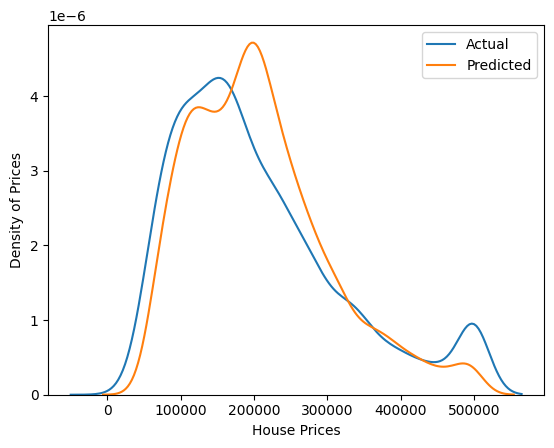

In [82]:
sns.kdeplot(y_test, label='Actual')
sns.kdeplot(test_pred, label='Predicted')
plt.xlabel('House Prices')
plt.ylabel('Density of Prices')
plt.legend()
plt.show()